In [1]:
from google.colab import drive
drive.mount('/content/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/data


In [2]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
from matplotlib import pyplot as plt

from tqdm import tqdm

In [0]:
def rename_files(direc, obj):
    i = 1
    for filename in os.listdir(direc):
        os.rename(direc+"/"+filename, direc+"/"+ obj + str(i)+".jpg")
        i = i + 1
rename_files('data/My Drive/lab1_cvpr/eiffel_tower', "my_cat")
rename_files('data/My Drive/lab1_cvpr/eiffel_tower', "eiffel_tower")
rename_files('data/My Drive/lab1_cvpr/no_my_cat', "no_my_cat")
rename_files('data/My Drive/lab1_cvpr/no_eiffel_tower', "no_eiffel_tower")

In [0]:
def load_data(DATADIR):

  CATEGORIES = ["my_cat", "eiffel_tower","no_my_cat","no_eiffel_tower"]
  #IMG_SIZE = 224
  training_data = []

  def create_training_data():
      for category in CATEGORIES:  
          path = os.path.join(DATADIR,category)  
          class_num = CATEGORIES.index(category) 
          for img in tqdm(os.listdir(path)): 
              try:
                  img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE )
                  #new_array = cv2.resize(img_array,(IMG_SIZE , IMG_SIZE)) 
                  training_data.append([img_array, class_num]) 
              except Exception as e:  
                  print(img)
              

  create_training_data()
  return training_data

In [0]:
def Sift():
  detector = cv2.SIFT_create()
  results = []
  for image in gray_images:
    (kps, desc) = detector.detectAndCompute(image, None)
    results.append((kps,desc,image))
  (kps_good, descs_good) = detector.detectAndCompute(good_gray_image, None)

  i = 0
  for (kps, desc, image) in results:
    f.write(pref+" Image "+str(i)+"\n")
    f.write("keypoints: {}, descriptors: {}".format(len(kps), desc.shape)+"\n")
    print("keypoints: {}, descriptors: {}".format(len(kps), desc.shape))
    start_time = time.time()

    bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=False)
    matches = bf.knnMatch(desc,descs_good,k=2) 

    good = []
    for m, n in matches:
      if m.distance < 0.9 * n.distance:
        good.append([m])

    img3 = cv2.drawMatchesKnn(image, kps, good_gray_image, kps_good, good[:10], None, flags=2)
    cv2.imwrite("../results/"+pref+"res"+str(i)+".jpg", img3)
    f.write("Time: {}\n".format(time.time()-start_time))
    i = i + 1

In [0]:
def kaze():
  detector = cv2.KAZE_create()
  results = []
  for image in gray_images:
    (kps, desc) = detector.detectAndCompute(image, None)
    results.append((kps,desc,image))
  (kps_good, descs_good) = detector.detectAndCompute(good_gray_image, None)

  i = 0
  for (kps, desc, image) in results:
    f.write(pref+" Image "+str(i)+"\n")
    f.write("keypoints: {}, descriptors: {}".format(len(kps), desc.shape)+"\n")
    print("keypoints: {}, descriptors: {}".format(len(kps), desc.shape))
    start_time = time.time()

    bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=False)
    matches = bf.knnMatch(desc,descs_good,k=2) 

    good = []
    for m, n in matches:
      if m.distance < 0.9 * n.distance:
        good.append([m])

    img3 = cv2.drawMatchesKnn(image, kps, good_gray_image, kps_good, good[:10], None, flags=2)
    cv2.imwrite("../results/"+pref+"res"+str(i)+".jpg", img3)
    f.write("Time: {}\n".format(time.time()-start_time))
    i = i + 1

In [0]:
def main():
  #load data
  #datadir = 'data/My Drive/lab1_cvpr'
  #data = load_data("data/My Drive/lab1_cvpr")
  
  X = []
  y = []

  #for features,label in data:
  #    X.append(features)
  #    y.append(label)

  #pickle_out = open("X.pickle","wb")
  #pickle.dump(X, pickle_out)
  #pickle_out.close()

  #pickle_out = open("y.pickle","wb")
  #pickle.dump(y, pickle_out)
  #pickle_out.close()
  pickle_in = open("X.pickle","rb") 
  X = pickle.load(pickle_in)

  pickle_in = open("y.pickle","rb") 
  y = pickle.load(pickle_in)
  X_arr = np.array(X)
  y_arr = np.array(y)
  y_arr = y_arr.reshape((len(y_arr),1))
  plt.imshow(X[0], interpolation='nearest')
  plt.show()
  plt.imshow(X[200], interpolation='nearest')
  plt.show()
  plt.imshow(X[400], interpolation='nearest')
  plt.show()
  plt.imshow(X[600], interpolation='nearest')
  plt.show()
  

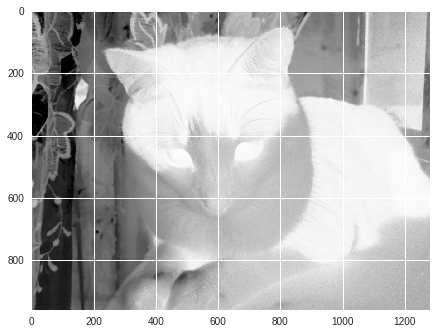

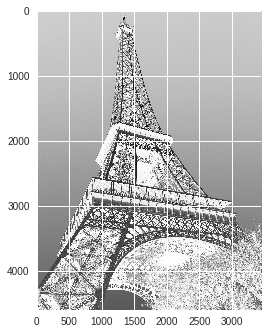

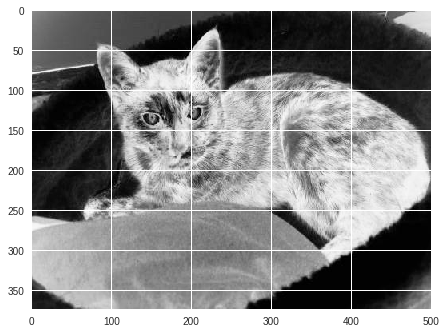

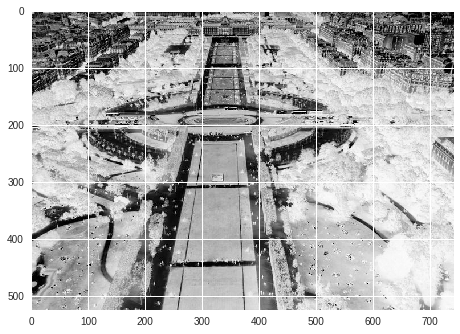

In [47]:
main()

NameError: ignored